In [4]:
import pandas as pd
import torch
from torch import nn
import gensim
from gensim.models import KeyedVectors
import sklearn
import torchmetrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('main_dataset.csv',  encoding='UTF-8')

In [6]:
df.head()

,id,text,label
0,1,на работе был полный пиддес :| и так каждое за...,0.0
1,2,"Коллеги сидят рубятся в Urban terror, а я из-з...",1.0
2,3,@elina_4post как говорят обещаного три года жд...,0.0
3,4,"Желаю хорошего полёта и удачной посадки,я буду...",0.0
4,5,"Обновил за каким-то лешим surf, теперь не рабо...",0.0


In [7]:
df.isna().sum()

id       0
text     0
label    0
dtype: int64

In [8]:
df.head()

,id,text,label
0,1,на работе был полный пиддес :| и так каждое за...,0.0
1,2,"Коллеги сидят рубятся в Urban terror, а я из-з...",1.0
2,3,@elina_4post как говорят обещаного три года жд...,0.0
3,4,"Желаю хорошего полёта и удачной посадки,я буду...",0.0
4,5,"Обновил за каким-то лешим surf, теперь не рабо...",0.0


In [9]:
df.tail()

,id,text,label
15870,15871,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
15871,15872,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
15872,15873,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
15873,15874,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0
15874,15875,До сих пор пересматриваю его видео. Орамбо кст...,0.0


In [10]:
df['text'].unique

<bound method Series.unique of 0        на работе был полный пиддес :| и так каждое за...
1        Коллеги сидят рубятся в Urban terror, а я из-з...
2        @elina_4post как говорят обещаного три года жд...
3        Желаю хорошего полёта и удачной посадки,я буду...
4        Обновил за каким-то лешим surf, теперь не рабо...
                               ...                        
15870    Вонючий совковый скот прибежал и ноет. А вот и...
15871    А кого любить? Гоблина тупорылого что-ли? Или ...
15872    Посмотрел Утомленных солнцем 2. И оказалось, ч...
15873    КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...
15874    До сих пор пересматриваю его видео. Орамбо кст...
Name: text, Length: 15875, dtype: object>

In [11]:
import string

In [12]:
df.head()

,id,text,label
0,1,на работе был полный пиддес :| и так каждое за...,0.0
1,2,"Коллеги сидят рубятся в Urban terror, а я из-з...",1.0
2,3,@elina_4post как говорят обещаного три года жд...,0.0
3,4,"Желаю хорошего полёта и удачной посадки,я буду...",0.0
4,5,"Обновил за каким-то лешим surf, теперь не рабо...",0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15875 entries, 0 to 15874
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15875 non-null  int64  
 1   text    15875 non-null  object 
 2   label   15875 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.2+ KB


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [16]:
print(df['text'].apply(type).value_counts())


<class 'str'>    15875
Name: text, dtype: int64


In [17]:
!pip install stop-words


In [18]:
import stop_words
#stop_words_russian = set(stopwords.words('russian'))
stop_words_russian = stop_words.get_stop_words('russian')

In [19]:

# Convert non-string values to empty string
df['text'] = df['text'].apply(lambda x: str(x) if type(x) != str else x)

# Remove stop words from the text column
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_russian]))

In [20]:
df.head()

,id,text,label
0,1,"работе полный пиддес :| закрытие месяца, свихн...",0.0
1,2,"Коллеги сидят рубятся Urban terror, из-за долб...",1.0
2,3,@elina_4post говорят обещаного ждут...((,0.0
3,4,"Желаю хорошего полёта удачной посадки,я сильно...",0.0
4,5,"Обновил каким-то лешим surf, работает простопл...",0.0


In [21]:
# Define a function to convert text to lowercase
def convert_to_lower(text):
    return text.lower()

# Apply the function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(convert_to_lower)

In [22]:
df.head(15)

,id,text,label
0,1,"работе полный пиддес :| закрытие месяца, свихн...",0.0
1,2,"коллеги сидят рубятся urban terror, из-за долб...",1.0
2,3,@elina_4post говорят обещаного ждут...((,0.0
3,4,"желаю хорошего полёта удачной посадки,я сильно...",0.0
4,5,"обновил каким-то лешим surf, работает простопл...",0.0
5,6,"котёнка вчера носик разбила, плакала расстраив...",0.0
6,7,"@juliamayko @o_nika55 @and_possum зашли, затих...",0.0
7,8,вообще болею - выздоравливаю :(,0.0
8,9,микрофраза :( учимся срать кирпичами режиме &a...,1.0
9,10,"хочу помириться , сука гордая сделаю! (((",1.0


In [23]:
import re
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Apply the function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(remove_urls)

In [24]:
df.tail(20)

,id,text,label
15855,15856,"тасс, 21 марта. премьер-министр новой зеландии...",0.0
15856,15857,"вой подсоса гомофорсера что, говно, неприятно ...",1.0
15857,15858,шлюха. парад шлюх.,1.0
15858,15859,дебил-куколд значение знаешь?,1.0
15859,15860,"хуею сосачеры, большиство прыщавые жиртресты р...",1.0
15860,15861,что-то появившееся небе пугает туристов расска...,1.0
15861,15862,моча анимаче решила окончательно убить реакшен...,1.0
15862,15863,65 мало? гражданина рейтинг 90 3 дня записи ви...,0.0
15863,15864,"зря, вас, хохлов, свиньями кличут. грязные жив...",1.0
15864,15865,прямо сразу ватан бросился своему кредитному н...,1.0


In [25]:


# Define a function to remove punctuation and extra spaces from a text string
def remove_punct_and_extra_space(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra space
    text = re.sub(' +', ' ', text)
    return text

# Apply the function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(remove_punct_and_extra_space)


In [26]:
df.tail(15)

,id,text,label
15860,15861,чтото появившееся небе пугает туристов рассказ...,1.0
15861,15862,моча анимаче решила окончательно убить реакшен...,1.0
15862,15863,65 мало гражданина рейтинг 90 3 дня записи видео,0.0
15863,15864,зря вас хохлов свиньями кличут грязные животны...,1.0
15864,15865,прямо сразу ватан бросился своему кредитному н...,1.0
15865,15866,эй михалыч пожарка пищит хуй пущай пищит смори...,1.0
15866,15867,пусть евровидение стримит долбоеб чтоли послед...,1.0
15867,15868,женщина венец творения помните ваньки стоите ж...,1.0
15868,15869,авиакомпании вместе специалистами гугл карт см...,1.0
15869,15870,запад прошел хуйню пару сотен назад большинств...,0.0


In [27]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [28]:
# Tokenize the text in the 'text' column
df['text_tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

In [29]:
df.tail(15)

,id,text,label,text_tokenized
15860,15861,чтото появившееся небе пугает туристов рассказ...,1.0,"[чтото, появившееся, небе, пугает, туристов, р..."
15861,15862,моча анимаче решила окончательно убить реакшен...,1.0,"[моча, анимаче, решила, окончательно, убить, р..."
15862,15863,65 мало гражданина рейтинг 90 3 дня записи видео,0.0,"[65, мало, гражданина, рейтинг, 90, 3, дня, за..."
15863,15864,зря вас хохлов свиньями кличут грязные животны...,1.0,"[зря, вас, хохлов, свиньями, кличут, грязные, ..."
15864,15865,прямо сразу ватан бросился своему кредитному н...,1.0,"[прямо, сразу, ватан, бросился, своему, кредит..."
15865,15866,эй михалыч пожарка пищит хуй пущай пищит смори...,1.0,"[эй, михалыч, пожарка, пищит, хуй, пущай, пищи..."
15866,15867,пусть евровидение стримит долбоеб чтоли послед...,1.0,"[пусть, евровидение, стримит, долбоеб, чтоли, ..."
15867,15868,женщина венец творения помните ваньки стоите ж...,1.0,"[женщина, венец, творения, помните, ваньки, ст..."
15868,15869,авиакомпании вместе специалистами гугл карт см...,1.0,"[авиакомпании, вместе, специалистами, гугл, ка..."
15869,15870,запад прошел хуйню пару сотен назад большинств...,0.0,"[запад, прошел, хуйню, пару, сотен, назад, бол..."


In [30]:
!pip install pymorphy2

In [31]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) >= 1:
        return tokens
    return None

data = df.text.apply(lemmatize)
#data = data.dropna()
data

0        [работа, полный, пиддес, закрытие, месяц, свих...
1        [коллега, сидеть, рубиться, изз, долбать, винд...
2                              [говорить, обещаной, ждать]
3        [желать, хороший, полёт, удачный, посадкия, си...
4        [обновить, какимтый, леший, работать, простопл...
                               ...                        
15870    [вонючий, совковый, скот, прибежать, ныть, сто...
15871    [любить, гоблин, тупорылый, чтоль, какуюнибудь...
15872    [посмотреть, утомлённый, солнце, оказаться, хо...
15873    [крымотред, нарушать, правило, раздел, тк, обс...
15874    [пересматривать, видео, орамбо, кстати, свой, ...
Name: text, Length: 15875, dtype: object

In [32]:
df3=pd.DataFrame(columns=['id','text','label'])
df3['text']=data
df3['id']=df['id']
df3['label']=df['label']
df3=df3.dropna()
df3

,id,text,label
0,1,"[работа, полный, пиддес, закрытие, месяц, свих...",0.0
1,2,"[коллега, сидеть, рубиться, изз, долбать, винд...",1.0
2,3,"[говорить, обещаной, ждать]",0.0
3,4,"[желать, хороший, полёт, удачный, посадкия, си...",0.0
4,5,"[обновить, какимтый, леший, работать, простопл...",0.0
...,...,...,...
15870,15871,"[вонючий, совковый, скот, прибежать, ныть, сто...",1.0
15871,15872,"[любить, гоблин, тупорылый, чтоль, какуюнибудь...",1.0
15872,15873,"[посмотреть, утомлённый, солнце, оказаться, хо...",0.0
15873,15874,"[крымотред, нарушать, правило, раздел, тк, обс...",1.0


In [33]:
df3.isna().sum()

id       0
text     0
label    0
dtype: int64

In [38]:
model = KeyedVectors.load_word2vec_format('C:/Users/Admin/Documents/pythonNLP/word2vecmod/65/model.bin', binary=True)

In [39]:
def get_vector(word):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)

# функция для получения среднего вектора всех слов в тексте
def get_average_vector(text):
    vectors = [get_vector(word) for word in text]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word_vectors.vector_size)

In [40]:
train_df, test_df = train_test_split(df3, test_size=0.3, random_state=42)

In [43]:
vectors_train = [get_average_vector(text) for text in train_df['text']]
vectors_test = [get_average_vector(text) for text in test_df['text']]

In [44]:
x_train = torch.tensor(vectors_train)
x_test = torch.tensor(vectors_test)

In [45]:
y_train_list=list()
for i in train_df['label']:
    y_train_list.append(i)
y_train=torch.tensor(y_train_list)
y_train.unsqueeze_(1)

tensor([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [1.]])

In [46]:
y_test_list=list()
for i in test_df['label']:
    y_test_list.append(i)
y_test=torch.tensor(y_test_list)
y_test.unsqueeze_(1)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]])

In [48]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [49]:
Mk1=MLP(100,300,1)

In [50]:
if torch.cuda.is_available():
    dev = torch.device("cuda:0")
else:
    dev = torch.device("cpu")

In [51]:
if torch.cuda.is_available():
    dev=torch.device('cuda:0')
else: dev=torch.device('cpu:0')

In [52]:
x_train=x_train.to(dev)
x_test=x_test.to(dev)
y_train=y_train.to(dev)
y_test=y_test.to(dev)

In [53]:
Mk1=Mk1.to(dev)

In [54]:
optimizer = torch.optim.Adam(Mk1.parameters(), lr=0.001)
loss = nn.BCEWithLogitsLoss()
f1_score = torchmetrics.functional.f1_score
accuracy = torchmetrics.functional.accuracy
diagdf=pd.DataFrame(columns=['Epoch','loss','F1-score','accuracy'])
for epoch in range(10000):
    optimizer.zero_grad()
    pred = Mk1.forward(x_train.float())
    l = loss(pred, y_train) # squeeze the predicted tensor
    l.backward()
    f1= f1_score(pred, y_train, task='binary')
    acc=accuracy(pred, y_train, task='binary')
    data={'Epoch':epoch,'loss':l.item(),'F1-score':f1.item(),'accuracy':acc.item()}
    diagdf = pd.concat([diagdf, pd.DataFrame(data, index=[epoch])], ignore_index=True)
    optimizer.step()
    print('Epoch: ', epoch+1, ', Loss: ', l.item(),'  f1-score:', f1.item(),"  accuracy:", acc.item())

Epoch:  1 , Loss:  0.8100041747093201   f1-score: 0.5077030062675476   accuracy: 0.42711710929870605
Epoch:  2 , Loss:  0.8040925860404968   f1-score: 0.1392373889684677   accuracy: 0.6847747564315796
Epoch:  3 , Loss:  0.7982625961303711   f1-score: 0.0005451076431199908   accuracy: 0.6696396470069885
Epoch:  4 , Loss:  0.7924745082855225   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  5 , Loss:  0.7866997718811035   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  6 , Loss:  0.7809126973152161   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  7 , Loss:  0.7751019597053528   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  8 , Loss:  0.7692704796791077   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  9 , Loss:  0.7634300589561462   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  10 , Loss:  0.7576064467430115   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  11 , Loss:  0.7518355846405029   f1-score: 0.0   accuracy: 0.6696396470069885
Epoch:  12 , L

Epoch:  99 , Loss:  0.6601691842079163   f1-score: 0.5435897707939148   accuracy: 0.7835134863853455
Epoch:  100 , Loss:  0.6594714522361755   f1-score: 0.5430690050125122   accuracy: 0.7835134863853455
Epoch:  101 , Loss:  0.6588059663772583   f1-score: 0.5436229109764099   accuracy: 0.7836936712265015
Epoch:  102 , Loss:  0.6581535935401917   f1-score: 0.5460751056671143   accuracy: 0.7843243479728699
Epoch:  103 , Loss:  0.6575031280517578   f1-score: 0.5521010160446167   accuracy: 0.7858558297157288
Epoch:  104 , Loss:  0.6568529605865479   f1-score: 0.5599401593208313   accuracy: 0.7880180478096008
Epoch:  105 , Loss:  0.6562081575393677   f1-score: 0.5696834921836853   accuracy: 0.7905405163764954
Epoch:  106 , Loss:  0.6555784940719604   f1-score: 0.5785033106803894   accuracy: 0.792972981929779
Epoch:  107 , Loss:  0.654975175857544   f1-score: 0.5898784399032593   accuracy: 0.796306312084198
Epoch:  108 , Loss:  0.6544075012207031   f1-score: 0.6005015969276428   accuracy: 0.7

Epoch:  193 , Loss:  0.6396776437759399   f1-score: 0.7066922783851624   accuracy: 0.8349549770355225
Epoch:  194 , Loss:  0.6396136283874512   f1-score: 0.7074263691902161   accuracy: 0.8353152871131897
Epoch:  195 , Loss:  0.6395502090454102   f1-score: 0.7076331973075867   accuracy: 0.8354054093360901
Epoch:  196 , Loss:  0.639487624168396   f1-score: 0.7079334855079651   accuracy: 0.8354954719543457
Epoch:  197 , Loss:  0.6394256353378296   f1-score: 0.7089659571647644   accuracy: 0.8359459638595581
Epoch:  198 , Loss:  0.6393644213676453   f1-score: 0.7094713449478149   accuracy: 0.8361261487007141
Epoch:  199 , Loss:  0.639303982257843   f1-score: 0.7100686430931091   accuracy: 0.8363063335418701
Epoch:  200 , Loss:  0.6392441391944885   f1-score: 0.7101819515228271   accuracy: 0.8363963961601257
Epoch:  201 , Loss:  0.6391850709915161   f1-score: 0.7104801535606384   accuracy: 0.8364864587783813
Epoch:  202 , Loss:  0.6391265392303467   f1-score: 0.7115077972412109   accuracy: 0

Epoch:  290 , Loss:  0.6355293989181519   f1-score: 0.737758457660675   accuracy: 0.8480179905891418
Epoch:  291 , Loss:  0.6354990601539612   f1-score: 0.7379546165466309   accuracy: 0.8481081128120422
Epoch:  292 , Loss:  0.6354689598083496   f1-score: 0.7381507158279419   accuracy: 0.8481981754302979
Epoch:  293 , Loss:  0.635438859462738   f1-score: 0.7387387156486511   accuracy: 0.8484684824943542
Epoch:  294 , Loss:  0.6354089975357056   f1-score: 0.7388198971748352   accuracy: 0.8484684824943542
Epoch:  295 , Loss:  0.6353791952133179   f1-score: 0.7394071221351624   accuracy: 0.8487387299537659
Epoch:  296 , Loss:  0.6353495717048645   f1-score: 0.7394071221351624   accuracy: 0.8487387299537659
Epoch:  297 , Loss:  0.6353198885917664   f1-score: 0.7399131059646606   accuracy: 0.8490090370178223
Epoch:  298 , Loss:  0.6352904438972473   f1-score: 0.7406143546104431   accuracy: 0.8493693470954895
Epoch:  299 , Loss:  0.6352611184120178   f1-score: 0.7404994368553162   accuracy: 0

Epoch:  384 , Loss:  0.6330385208129883   f1-score: 0.7534583210945129   accuracy: 0.8554955124855042
Epoch:  385 , Loss:  0.6330143809318542   f1-score: 0.7534183263778687   accuracy: 0.8554053902626038
Epoch:  386 , Loss:  0.6329902410507202   f1-score: 0.7531869411468506   accuracy: 0.8552252054214478
Epoch:  387 , Loss:  0.6329661011695862   f1-score: 0.7533783912658691   accuracy: 0.8553153276443481
Epoch:  388 , Loss:  0.6329419612884521   f1-score: 0.7533783912658691   accuracy: 0.8553153276443481
Epoch:  389 , Loss:  0.6329177618026733   f1-score: 0.7532626986503601   accuracy: 0.8552252054214478
Epoch:  390 , Loss:  0.6328935623168945   f1-score: 0.7534540891647339   accuracy: 0.8553153276443481
Epoch:  391 , Loss:  0.6328692436218262   f1-score: 0.7533384561538696   accuracy: 0.8552252054214478
Epoch:  392 , Loss:  0.6328450441360474   f1-score: 0.7532228231430054   accuracy: 0.8551351428031921
Epoch:  393 , Loss:  0.6328206062316895   f1-score: 0.7534141540527344   accuracy:

Epoch:  478 , Loss:  0.6307643055915833   f1-score: 0.7622687816619873   accuracy: 0.8599098920822144
Epoch:  479 , Loss:  0.6307411789894104   f1-score: 0.7622687816619873   accuracy: 0.8599098920822144
Epoch:  480 , Loss:  0.6307181715965271   f1-score: 0.7621960639953613   accuracy: 0.8599098920822144
Epoch:  481 , Loss:  0.6306952834129333   f1-score: 0.7623853087425232   accuracy: 0.8600000143051147
Epoch:  482 , Loss:  0.63067227602005   f1-score: 0.7627636790275574   accuracy: 0.8601801991462708
Epoch:  483 , Loss:  0.6306493878364563   f1-score: 0.7629527449607849   accuracy: 0.8602702617645264
Epoch:  484 , Loss:  0.6306265592575073   f1-score: 0.7634474039077759   accuracy: 0.8605405688285828
Epoch:  485 , Loss:  0.6306037306785583   f1-score: 0.7636363506317139   accuracy: 0.8606306314468384
Epoch:  486 , Loss:  0.6305809617042542   f1-score: 0.7636363506317139   accuracy: 0.8606306314468384
Epoch:  487 , Loss:  0.6305583119392395   f1-score: 0.7636363506317139   accuracy: 0

Epoch:  577 , Loss:  0.628491997718811   f1-score: 0.7727895379066467   accuracy: 0.865495502948761
Epoch:  578 , Loss:  0.6284673810005188   f1-score: 0.7728586792945862   accuracy: 0.865495502948761
Epoch:  579 , Loss:  0.6284427642822266   f1-score: 0.7728586792945862   accuracy: 0.865495502948761
Epoch:  580 , Loss:  0.6284180879592896   f1-score: 0.7730453014373779   accuracy: 0.8655855655670166
Epoch:  581 , Loss:  0.6283932328224182   f1-score: 0.7730453014373779   accuracy: 0.8655855655670166
Epoch:  582 , Loss:  0.6283684372901917   f1-score: 0.7730453014373779   accuracy: 0.8655855655670166
Epoch:  583 , Loss:  0.6283435821533203   f1-score: 0.7736049890518188   accuracy: 0.865855872631073
Epoch:  584 , Loss:  0.6283188462257385   f1-score: 0.7736049890518188   accuracy: 0.865855872631073
Epoch:  585 , Loss:  0.6282936930656433   f1-score: 0.7737914323806763   accuracy: 0.8659459352493286
Epoch:  586 , Loss:  0.628268837928772   f1-score: 0.7737914323806763   accuracy: 0.8659

Epoch:  674 , Loss:  0.6261546611785889   f1-score: 0.786489725112915   accuracy: 0.8724324107170105
Epoch:  675 , Loss:  0.6261314153671265   f1-score: 0.7866727113723755   accuracy: 0.8725225329399109
Epoch:  676 , Loss:  0.6261081099510193   f1-score: 0.7866727113723755   accuracy: 0.8725225329399109
Epoch:  677 , Loss:  0.6260848641395569   f1-score: 0.7868555784225464   accuracy: 0.8726125955581665
Epoch:  678 , Loss:  0.6260616779327393   f1-score: 0.7870384454727173   accuracy: 0.8727027177810669
Epoch:  679 , Loss:  0.6260383725166321   f1-score: 0.7872211933135986   accuracy: 0.8727927803993225
Epoch:  680 , Loss:  0.6260151267051697   f1-score: 0.7873398661613464   accuracy: 0.8728829026222229
Epoch:  681 , Loss:  0.6259920597076416   f1-score: 0.7878239750862122   accuracy: 0.8731531500816345
Epoch:  682 , Loss:  0.6259686350822449   f1-score: 0.7878239750862122   accuracy: 0.8731531500816345
Epoch:  683 , Loss:  0.6259454488754272   f1-score: 0.7878239750862122   accuracy: 

Epoch:  766 , Loss:  0.6239861249923706   f1-score: 0.7989227771759033   accuracy: 0.8789189457893372
Epoch:  767 , Loss:  0.6239618062973022   f1-score: 0.7991024851799011   accuracy: 0.8790090084075928
Epoch:  768 , Loss:  0.6239380240440369   f1-score: 0.7991024851799011   accuracy: 0.8790090084075928
Epoch:  769 , Loss:  0.6239137649536133   f1-score: 0.7991024851799011   accuracy: 0.8790090084075928
Epoch:  770 , Loss:  0.6238898038864136   f1-score: 0.7991024851799011   accuracy: 0.8790090084075928
Epoch:  771 , Loss:  0.6238656044006348   f1-score: 0.7994016408920288   accuracy: 0.8791891932487488
Epoch:  772 , Loss:  0.6238415241241455   f1-score: 0.79934161901474   accuracy: 0.8791891932487488
Epoch:  773 , Loss:  0.6238175630569458   f1-score: 0.79934161901474   accuracy: 0.8791891932487488
Epoch:  774 , Loss:  0.6237933039665222   f1-score: 0.7991619110107422   accuracy: 0.8790990710258484
Epoch:  775 , Loss:  0.6237693428993225   f1-score: 0.7998204827308655   accuracy: 0.8

Epoch:  860 , Loss:  0.621727466583252   f1-score: 0.8098779916763306   accuracy: 0.884864866733551
Epoch:  861 , Loss:  0.6217041611671448   f1-score: 0.8098779916763306   accuracy: 0.884864866733551
Epoch:  862 , Loss:  0.6216805577278137   f1-score: 0.8098214268684387   accuracy: 0.884864866733551
Epoch:  863 , Loss:  0.6216574311256409   f1-score: 0.8102960586547852   accuracy: 0.8851351141929626
Epoch:  864 , Loss:  0.6216338872909546   f1-score: 0.8106499910354614   accuracy: 0.8853152990341187
Epoch:  865 , Loss:  0.6216105222702026   f1-score: 0.8111804723739624   accuracy: 0.885585606098175
Epoch:  866 , Loss:  0.6215871572494507   f1-score: 0.8113572001457214   accuracy: 0.8856756687164307
Epoch:  867 , Loss:  0.621563732624054   f1-score: 0.8115338683128357   accuracy: 0.885765790939331
Epoch:  868 , Loss:  0.621540367603302   f1-score: 0.81171053647995   accuracy: 0.8858558535575867
Epoch:  869 , Loss:  0.6215167045593262   f1-score: 0.81171053647995   accuracy: 0.885855853

Epoch:  950 , Loss:  0.6196125745773315   f1-score: 0.8207784295082092   accuracy: 0.8909009099006653
Epoch:  951 , Loss:  0.6195895075798035   f1-score: 0.8209529519081116   accuracy: 0.8909909725189209
Epoch:  952 , Loss:  0.6195663809776306   f1-score: 0.8211274147033691   accuracy: 0.8910810947418213
Epoch:  953 , Loss:  0.6195431351661682   f1-score: 0.8211274147033691   accuracy: 0.8910810947418213
Epoch:  954 , Loss:  0.6195201277732849   f1-score: 0.8211274147033691   accuracy: 0.8910810947418213
Epoch:  955 , Loss:  0.6194969415664673   f1-score: 0.8214761018753052   accuracy: 0.8912612795829773
Epoch:  956 , Loss:  0.6194738745689392   f1-score: 0.8214761018753052   accuracy: 0.8912612795829773
Epoch:  957 , Loss:  0.6194508671760559   f1-score: 0.8217719197273254   accuracy: 0.8914414644241333
Epoch:  958 , Loss:  0.6194279193878174   f1-score: 0.8219461441040039   accuracy: 0.8915315270423889
Epoch:  959 , Loss:  0.6194049715995789   f1-score: 0.8219461441040039   accuracy:

Epoch:  1043 , Loss:  0.6175304651260376   f1-score: 0.8300161957740784   accuracy: 0.8961261510848999
Epoch:  1044 , Loss:  0.6175081729888916   f1-score: 0.8301886916160583   accuracy: 0.8962162137031555
Epoch:  1045 , Loss:  0.6174861192703247   f1-score: 0.8303610682487488   accuracy: 0.8963063359260559
Epoch:  1046 , Loss:  0.6174639463424683   f1-score: 0.8308780193328857   accuracy: 0.8965765833854675
Epoch:  1047 , Loss:  0.617441713809967   f1-score: 0.8305334448814392   accuracy: 0.8963963985443115
Epoch:  1048 , Loss:  0.6174197196960449   f1-score: 0.8308780193328857   accuracy: 0.8965765833854675
Epoch:  1049 , Loss:  0.6173975467681885   f1-score: 0.8310502171516418   accuracy: 0.8966666460037231
Epoch:  1050 , Loss:  0.6173752546310425   f1-score: 0.8313448429107666   accuracy: 0.8968468308448792
Epoch:  1051 , Loss:  0.6173532009124756   f1-score: 0.831222414970398   accuracy: 0.8967567682266235
Epoch:  1052 , Loss:  0.6173309087753296   f1-score: 0.831222414970398   ac

Epoch:  1137 , Loss:  0.6153690218925476   f1-score: 0.8387476205825806   accuracy: 0.9011711478233337
Epoch:  1138 , Loss:  0.6153464913368225   f1-score: 0.8387476205825806   accuracy: 0.9011711478233337
Epoch:  1139 , Loss:  0.6153238415718079   f1-score: 0.8392595052719116   accuracy: 0.9014414548873901
Epoch:  1140 , Loss:  0.6153014898300171   f1-score: 0.8392595052719116   accuracy: 0.9014414548873901
Epoch:  1141 , Loss:  0.615278959274292   f1-score: 0.8393067121505737   accuracy: 0.9014414548873901
Epoch:  1142 , Loss:  0.6152567267417908   f1-score: 0.8393067121505737   accuracy: 0.9014414548873901
Epoch:  1143 , Loss:  0.6152341961860657   f1-score: 0.8394771814346313   accuracy: 0.9015315175056458
Epoch:  1144 , Loss:  0.6152118444442749   f1-score: 0.8394771814346313   accuracy: 0.9015315175056458
Epoch:  1145 , Loss:  0.6151894927024841   f1-score: 0.8397709131240845   accuracy: 0.9017117023468018
Epoch:  1146 , Loss:  0.6151670217514038   f1-score: 0.8397709131240845   

Epoch:  1226 , Loss:  0.6134952306747437   f1-score: 0.8444509506225586   accuracy: 0.9044144153594971
Epoch:  1227 , Loss:  0.6134750843048096   f1-score: 0.8446986079216003   accuracy: 0.9045946002006531
Epoch:  1228 , Loss:  0.6134548783302307   f1-score: 0.8445292115211487   accuracy: 0.9045044779777527
Epoch:  1229 , Loss:  0.6134347915649414   f1-score: 0.8445292115211487   accuracy: 0.9045044779777527
Epoch:  1230 , Loss:  0.6134148240089417   f1-score: 0.8445292115211487   accuracy: 0.9045044779777527
Epoch:  1231 , Loss:  0.6133943796157837   f1-score: 0.8445292115211487   accuracy: 0.9045044779777527
Epoch:  1232 , Loss:  0.6133740544319153   f1-score: 0.8445292115211487   accuracy: 0.9045044779777527
Epoch:  1233 , Loss:  0.6133540868759155   f1-score: 0.8444053530693054   accuracy: 0.9044144153594971
Epoch:  1234 , Loss:  0.6133337616920471   f1-score: 0.8446986079216003   accuracy: 0.9045946002006531
Epoch:  1235 , Loss:  0.613313615322113   f1-score: 0.8445748090744019   

Epoch:  1315 , Loss:  0.611606240272522   f1-score: 0.8532204031944275   accuracy: 0.9094594717025757
Epoch:  1316 , Loss:  0.6115847229957581   f1-score: 0.8532204031944275   accuracy: 0.9094594717025757
Epoch:  1317 , Loss:  0.6115633249282837   f1-score: 0.8530528545379639   accuracy: 0.9093693494796753
Epoch:  1318 , Loss:  0.6115418076515198   f1-score: 0.8532204031944275   accuracy: 0.9094594717025757
Epoch:  1319 , Loss:  0.6115202307701111   f1-score: 0.8532204031944275   accuracy: 0.9094594717025757
Epoch:  1320 , Loss:  0.6114985346794128   f1-score: 0.8532204031944275   accuracy: 0.9094594717025757
Epoch:  1321 , Loss:  0.6114768981933594   f1-score: 0.8532204031944275   accuracy: 0.9094594717025757
Epoch:  1322 , Loss:  0.6114556193351746   f1-score: 0.8532204031944275   accuracy: 0.9094594717025757
Epoch:  1323 , Loss:  0.6114338040351868   f1-score: 0.8533450365066528   accuracy: 0.9095495343208313
Epoch:  1324 , Loss:  0.6114122867584229   f1-score: 0.8534696698188782   

Epoch:  1406 , Loss:  0.6097416281700134   f1-score: 0.8588975071907043   accuracy: 0.9130630493164062
Epoch:  1407 , Loss:  0.6097221374511719   f1-score: 0.8588975071907043   accuracy: 0.9130630493164062
Epoch:  1408 , Loss:  0.6097027063369751   f1-score: 0.8588975071907043   accuracy: 0.9130630493164062
Epoch:  1409 , Loss:  0.6096832752227783   f1-score: 0.8588975071907043   accuracy: 0.9130630493164062
Epoch:  1410 , Loss:  0.6096639633178711   f1-score: 0.8590643405914307   accuracy: 0.9131531715393066
Epoch:  1411 , Loss:  0.6096444129943848   f1-score: 0.8590643405914307   accuracy: 0.9131531715393066
Epoch:  1412 , Loss:  0.6096253395080566   f1-score: 0.8593155741691589   accuracy: 0.9133333563804626
Epoch:  1413 , Loss:  0.6096059679985046   f1-score: 0.8594824075698853   accuracy: 0.9134234189987183
Epoch:  1414 , Loss:  0.6095869541168213   f1-score: 0.8594824075698853   accuracy: 0.9134234189987183
Epoch:  1415 , Loss:  0.6095675826072693   f1-score: 0.8594824075698853  

Epoch:  1496 , Loss:  0.6080705523490906   f1-score: 0.8648964166641235   accuracy: 0.9165765643119812
Epoch:  1497 , Loss:  0.6080518960952759   f1-score: 0.8648964166641235   accuracy: 0.9165765643119812
Epoch:  1498 , Loss:  0.6080331802368164   f1-score: 0.8648964166641235   accuracy: 0.9165765643119812
Epoch:  1499 , Loss:  0.6080145835876465   f1-score: 0.8650619983673096   accuracy: 0.9166666865348816
Epoch:  1500 , Loss:  0.607995867729187   f1-score: 0.8648964166641235   accuracy: 0.9165765643119812
Epoch:  1501 , Loss:  0.6079774498939514   f1-score: 0.8651488423347473   accuracy: 0.9167567491531372
Epoch:  1502 , Loss:  0.6079586744308472   f1-score: 0.8653144836425781   accuracy: 0.9168468713760376
Epoch:  1503 , Loss:  0.6079400181770325   f1-score: 0.8653144836425781   accuracy: 0.9168468713760376
Epoch:  1504 , Loss:  0.6079214215278625   f1-score: 0.8651488423347473   accuracy: 0.9167567491531372
Epoch:  1505 , Loss:  0.6079028844833374   f1-score: 0.8657718300819397   

Epoch:  1583 , Loss:  0.6065506339073181   f1-score: 0.8704376816749573   accuracy: 0.9197297096252441
Epoch:  1584 , Loss:  0.6065341830253601   f1-score: 0.8706018924713135   accuracy: 0.9198198318481445
Epoch:  1585 , Loss:  0.6065175533294678   f1-score: 0.8706018924713135   accuracy: 0.9198198318481445
Epoch:  1586 , Loss:  0.606501042842865   f1-score: 0.8706018924713135   accuracy: 0.9198198318481445
Epoch:  1587 , Loss:  0.6064844727516174   f1-score: 0.8706018924713135   accuracy: 0.9198198318481445
Epoch:  1588 , Loss:  0.6064677834510803   f1-score: 0.8706018924713135   accuracy: 0.9198198318481445
Epoch:  1589 , Loss:  0.606451690196991   f1-score: 0.8706018924713135   accuracy: 0.9198198318481445
Epoch:  1590 , Loss:  0.6064350605010986   f1-score: 0.8706018924713135   accuracy: 0.9198198318481445
Epoch:  1591 , Loss:  0.6064184904098511   f1-score: 0.8707284927368164   accuracy: 0.9199098944664001
Epoch:  1592 , Loss:  0.6064020991325378   f1-score: 0.8707284927368164   a

Epoch:  1674 , Loss:  0.6050922870635986   f1-score: 0.8770099878311157   accuracy: 0.9235135316848755
Epoch:  1675 , Loss:  0.6050764918327332   f1-score: 0.8771726489067078   accuracy: 0.9236035943031311
Epoch:  1676 , Loss:  0.605060338973999   f1-score: 0.8771726489067078   accuracy: 0.9236035943031311
Epoch:  1677 , Loss:  0.6050446033477783   f1-score: 0.8771726489067078   accuracy: 0.9236035943031311
Epoch:  1678 , Loss:  0.6050289869308472   f1-score: 0.8771726489067078   accuracy: 0.9236035943031311
Epoch:  1679 , Loss:  0.6050130128860474   f1-score: 0.8771726489067078   accuracy: 0.9236035943031311
Epoch:  1680 , Loss:  0.6049976348876953   f1-score: 0.877335250377655   accuracy: 0.9236937165260315
Epoch:  1681 , Loss:  0.6049821376800537   f1-score: 0.877335250377655   accuracy: 0.9236937165260315
Epoch:  1682 , Loss:  0.6049665212631226   f1-score: 0.87766033411026   accuracy: 0.9238739013671875
Epoch:  1683 , Loss:  0.6049510836601257   f1-score: 0.87766033411026   accura

Epoch:  1763 , Loss:  0.6038013696670532   f1-score: 0.8814440369606018   accuracy: 0.9260360598564148
Epoch:  1764 , Loss:  0.6037881970405579   f1-score: 0.8813167810440063   accuracy: 0.9259459376335144
Epoch:  1765 , Loss:  0.603774905204773   f1-score: 0.8814440369606018   accuracy: 0.9260360598564148
Epoch:  1766 , Loss:  0.6037617921829224   f1-score: 0.8813167810440063   accuracy: 0.9259459376335144
Epoch:  1767 , Loss:  0.6037484407424927   f1-score: 0.8814440369606018   accuracy: 0.9260360598564148
Epoch:  1768 , Loss:  0.6037355065345764   f1-score: 0.8813167810440063   accuracy: 0.9259459376335144
Epoch:  1769 , Loss:  0.6037221550941467   f1-score: 0.8814440369606018   accuracy: 0.9260360598564148
Epoch:  1770 , Loss:  0.6037090420722961   f1-score: 0.8814440369606018   accuracy: 0.9260360598564148
Epoch:  1771 , Loss:  0.6036959290504456   f1-score: 0.8813167810440063   accuracy: 0.9259459376335144
Epoch:  1772 , Loss:  0.6036826372146606   f1-score: 0.8813167810440063   

Epoch:  1853 , Loss:  0.6026116013526917   f1-score: 0.8850756883621216   accuracy: 0.9281982183456421
Epoch:  1854 , Loss:  0.6025981903076172   f1-score: 0.8850756883621216   accuracy: 0.9281982183456421
Epoch:  1855 , Loss:  0.6025850772857666   f1-score: 0.8850756883621216   accuracy: 0.9281982183456421
Epoch:  1856 , Loss:  0.6025717854499817   f1-score: 0.8849480748176575   accuracy: 0.9281080961227417
Epoch:  1857 , Loss:  0.6025583148002625   f1-score: 0.8851088285446167   accuracy: 0.9281982183456421
Epoch:  1858 , Loss:  0.602544903755188   f1-score: 0.8852695226669312   accuracy: 0.9282882809638977
Epoch:  1859 , Loss:  0.6025314927101135   f1-score: 0.8852695226669312   accuracy: 0.9282882809638977
Epoch:  1860 , Loss:  0.6025181412696838   f1-score: 0.8853971362113953   accuracy: 0.9283784031867981
Epoch:  1861 , Loss:  0.6025046110153198   f1-score: 0.8852695226669312   accuracy: 0.9282882809638977
Epoch:  1862 , Loss:  0.6024909019470215   f1-score: 0.8854301571846008   

Epoch:  1947 , Loss:  0.6014493107795715   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1948 , Loss:  0.6014379262924194   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1949 , Loss:  0.6014263033866882   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1950 , Loss:  0.6014151573181152   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1951 , Loss:  0.601404070854187   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1952 , Loss:  0.6013925671577454   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1953 , Loss:  0.6013816595077515   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1954 , Loss:  0.6013704538345337   f1-score: 0.8885689377784729   accuracy: 0.930270254611969
Epoch:  1955 , Loss:  0.601359486579895   f1-score: 0.8886969089508057   accuracy: 0.9303603768348694
Epoch:  1956 , Loss:  0.6013485789299011   f1-score: 0.8886969089508057   accuracy:

Epoch:  2037 , Loss:  0.6004848480224609   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2038 , Loss:  0.6004744172096252   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2039 , Loss:  0.6004639863967896   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2040 , Loss:  0.6004536151885986   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2041 , Loss:  0.6004431843757629   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2042 , Loss:  0.6004329323768616   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2043 , Loss:  0.6004225611686707   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2044 , Loss:  0.6004121899604797   f1-score: 0.8910948038101196   accuracy: 0.9318017959594727
Epoch:  2045 , Loss:  0.6004018783569336   f1-score: 0.8912230134010315   accuracy: 0.931891918182373
Epoch:  2046 , Loss:  0.6003916263580322   f1-score: 0.8912230134010315   

Epoch:  2125 , Loss:  0.5996857285499573   f1-score: 0.8932624459266663   accuracy: 0.9330630898475647
Epoch:  2126 , Loss:  0.5996779799461365   f1-score: 0.8932624459266663   accuracy: 0.9330630898475647
Epoch:  2127 , Loss:  0.5996699929237366   f1-score: 0.8932624459266663   accuracy: 0.9330630898475647
Epoch:  2128 , Loss:  0.5996620655059814   f1-score: 0.8934214115142822   accuracy: 0.9331531524658203
Epoch:  2129 , Loss:  0.5996543765068054   f1-score: 0.8934214115142822   accuracy: 0.9331531524658203
Epoch:  2130 , Loss:  0.599646270275116   f1-score: 0.8934214115142822   accuracy: 0.9331531524658203
Epoch:  2131 , Loss:  0.599638044834137   f1-score: 0.8934214115142822   accuracy: 0.9331531524658203
Epoch:  2132 , Loss:  0.5996301770210266   f1-score: 0.8934214115142822   accuracy: 0.9331531524658203
Epoch:  2133 , Loss:  0.5996224880218506   f1-score: 0.8934214115142822   accuracy: 0.9331531524658203
Epoch:  2134 , Loss:  0.5996143817901611   f1-score: 0.8934214115142822   a

Epoch:  2251 , Loss:  0.5987268090248108   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2252 , Loss:  0.5987194180488586   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2253 , Loss:  0.5987120270729065   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2254 , Loss:  0.5987043380737305   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2255 , Loss:  0.5986971259117126   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2256 , Loss:  0.5986897945404053   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2257 , Loss:  0.5986823439598083   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2258 , Loss:  0.5986751317977905   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2259 , Loss:  0.5986678600311279   f1-score: 0.8952353596687317   accuracy: 0.9342342615127563
Epoch:  2260 , Loss:  0.5986603498458862   f1-score: 0.8953638672828674  

Epoch:  2340 , Loss:  0.5980550646781921   f1-score: 0.8978363871574402   accuracy: 0.9357657432556152
Epoch:  2341 , Loss:  0.5980477333068848   f1-score: 0.8978363871574402   accuracy: 0.9357657432556152
Epoch:  2342 , Loss:  0.5980402827262878   f1-score: 0.8978363871574402   accuracy: 0.9357657432556152
Epoch:  2343 , Loss:  0.5980330109596252   f1-score: 0.8978363871574402   accuracy: 0.9357657432556152
Epoch:  2344 , Loss:  0.5980256199836731   f1-score: 0.8978363871574402   accuracy: 0.9357657432556152
Epoch:  2345 , Loss:  0.598018229007721   f1-score: 0.8978363871574402   accuracy: 0.9357657432556152
Epoch:  2346 , Loss:  0.5980108380317688   f1-score: 0.8979942798614502   accuracy: 0.9358558654785156
Epoch:  2347 , Loss:  0.5980035662651062   f1-score: 0.8979942798614502   accuracy: 0.9358558654785156
Epoch:  2348 , Loss:  0.5979961156845093   f1-score: 0.8979942798614502   accuracy: 0.9358558654785156
Epoch:  2349 , Loss:  0.5979887247085571   f1-score: 0.8979942798614502   

Epoch:  2436 , Loss:  0.5973919034004211   f1-score: 0.8996708393096924   accuracy: 0.9368468523025513
Epoch:  2437 , Loss:  0.597385823726654   f1-score: 0.8996708393096924   accuracy: 0.9368468523025513
Epoch:  2438 , Loss:  0.5973796844482422   f1-score: 0.8996708393096924   accuracy: 0.9368468523025513
Epoch:  2439 , Loss:  0.5973734259605408   f1-score: 0.8996708393096924   accuracy: 0.9368468523025513
Epoch:  2440 , Loss:  0.5973671674728394   f1-score: 0.8996708393096924   accuracy: 0.9368468523025513
Epoch:  2441 , Loss:  0.5973608493804932   f1-score: 0.8996708393096924   accuracy: 0.9368468523025513
Epoch:  2442 , Loss:  0.5973545908927917   f1-score: 0.8998282551765442   accuracy: 0.9369369149208069
Epoch:  2443 , Loss:  0.597348153591156   f1-score: 0.8998282551765442   accuracy: 0.9369369149208069
Epoch:  2444 , Loss:  0.5973415374755859   f1-score: 0.8998282551765442   accuracy: 0.9369369149208069
Epoch:  2445 , Loss:  0.5973348617553711   f1-score: 0.8998282551765442   a

Epoch:  2534 , Loss:  0.596851646900177   f1-score: 0.9009292125701904   accuracy: 0.9375675916671753
Epoch:  2535 , Loss:  0.5968471169471741   f1-score: 0.9009292125701904   accuracy: 0.9375675916671753
Epoch:  2536 , Loss:  0.5968424677848816   f1-score: 0.9009292125701904   accuracy: 0.9375675916671753
Epoch:  2537 , Loss:  0.5968379974365234   f1-score: 0.9010863304138184   accuracy: 0.9376576542854309
Epoch:  2538 , Loss:  0.5968334674835205   f1-score: 0.9010863304138184   accuracy: 0.9376576542854309
Epoch:  2539 , Loss:  0.596828818321228   f1-score: 0.9010863304138184   accuracy: 0.9376576542854309
Epoch:  2540 , Loss:  0.5968244075775146   f1-score: 0.9010863304138184   accuracy: 0.9376576542854309
Epoch:  2541 , Loss:  0.5968198776245117   f1-score: 0.9010863304138184   accuracy: 0.9376576542854309
Epoch:  2542 , Loss:  0.5968153476715088   f1-score: 0.9010863304138184   accuracy: 0.9376576542854309
Epoch:  2543 , Loss:  0.5968109369277954   f1-score: 0.9010863304138184   a

Epoch:  2623 , Loss:  0.596451997756958   f1-score: 0.9018431305885315   accuracy: 0.9381080865859985
Epoch:  2624 , Loss:  0.5964462757110596   f1-score: 0.9018431305885315   accuracy: 0.9381080865859985
Epoch:  2625 , Loss:  0.5964407324790955   f1-score: 0.9019719958305359   accuracy: 0.9381982088088989
Epoch:  2626 , Loss:  0.5964353680610657   f1-score: 0.9019719958305359   accuracy: 0.9381982088088989
Epoch:  2627 , Loss:  0.5964299440383911   f1-score: 0.9019719958305359   accuracy: 0.9381982088088989
Epoch:  2628 , Loss:  0.5964244604110718   f1-score: 0.9019719958305359   accuracy: 0.9381982088088989
Epoch:  2629 , Loss:  0.5964192152023315   f1-score: 0.9019719958305359   accuracy: 0.9381982088088989
Epoch:  2630 , Loss:  0.5964138507843018   f1-score: 0.9019719958305359   accuracy: 0.9381982088088989
Epoch:  2631 , Loss:  0.596408486366272   f1-score: 0.9019719958305359   accuracy: 0.9381982088088989
Epoch:  2632 , Loss:  0.5964031219482422   f1-score: 0.9019719958305359   a

Epoch:  2711 , Loss:  0.596001148223877   f1-score: 0.9031705260276794   accuracy: 0.938918948173523
Epoch:  2712 , Loss:  0.5959969162940979   f1-score: 0.9033271670341492   accuracy: 0.9390090107917786
Epoch:  2713 , Loss:  0.5959927439689636   f1-score: 0.9031705260276794   accuracy: 0.938918948173523
Epoch:  2714 , Loss:  0.5959884524345398   f1-score: 0.9033271670341492   accuracy: 0.9390090107917786
Epoch:  2715 , Loss:  0.5959842205047607   f1-score: 0.9033271670341492   accuracy: 0.9390090107917786
Epoch:  2716 , Loss:  0.5959799289703369   f1-score: 0.9033271670341492   accuracy: 0.9390090107917786
Epoch:  2717 , Loss:  0.5959757566452026   f1-score: 0.9033271670341492   accuracy: 0.9390090107917786
Epoch:  2718 , Loss:  0.5959714651107788   f1-score: 0.9033271670341492   accuracy: 0.9390090107917786
Epoch:  2719 , Loss:  0.595967173576355   f1-score: 0.9033271670341492   accuracy: 0.9390090107917786
Epoch:  2720 , Loss:  0.5959628820419312   f1-score: 0.9033271670341492   acc

Epoch:  2792 , Loss:  0.5956403017044067   f1-score: 0.9042659401893616   accuracy: 0.9395495653152466
Epoch:  2793 , Loss:  0.5956364274024963   f1-score: 0.9042659401893616   accuracy: 0.9395495653152466
Epoch:  2794 , Loss:  0.5956325531005859   f1-score: 0.9042659401893616   accuracy: 0.9395495653152466
Epoch:  2795 , Loss:  0.5956288576126099   f1-score: 0.9042659401893616   accuracy: 0.9395495653152466
Epoch:  2796 , Loss:  0.5956249237060547   f1-score: 0.9042659401893616   accuracy: 0.9395495653152466
Epoch:  2797 , Loss:  0.5956210494041443   f1-score: 0.9042659401893616   accuracy: 0.9395495653152466
Epoch:  2798 , Loss:  0.5956173539161682   f1-score: 0.9042659401893616   accuracy: 0.9395495653152466
Epoch:  2799 , Loss:  0.5956135988235474   f1-score: 0.9044222831726074   accuracy: 0.9396396279335022
Epoch:  2800 , Loss:  0.5956098437309265   f1-score: 0.9044222831726074   accuracy: 0.9396396279335022
Epoch:  2801 , Loss:  0.5956061482429504   f1-score: 0.9044222831726074  

Epoch:  2882 , Loss:  0.5953460931777954   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2883 , Loss:  0.5953434109687805   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2884 , Loss:  0.5953406691551208   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2885 , Loss:  0.5953380465507507   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2886 , Loss:  0.5953353047370911   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2887 , Loss:  0.595332682132721   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2888 , Loss:  0.595329999923706   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2889 , Loss:  0.5953274369239807   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2890 , Loss:  0.5953248143196106   f1-score: 0.90473473072052   accuracy: 0.9398198127746582
Epoch:  2891 , Loss:  0.5953221321105957   f1-score: 0.90473473072052   accuracy: 0.939819812

Epoch:  2965 , Loss:  0.5950916409492493   f1-score: 0.9053592085838318   accuracy: 0.9401801824569702
Epoch:  2966 , Loss:  0.595088541507721   f1-score: 0.9053592085838318   accuracy: 0.9401801824569702
Epoch:  2967 , Loss:  0.5950854420661926   f1-score: 0.9053592085838318   accuracy: 0.9401801824569702
Epoch:  2968 , Loss:  0.5950823426246643   f1-score: 0.905515193939209   accuracy: 0.9402702450752258
Epoch:  2969 , Loss:  0.5950793623924255   f1-score: 0.905515193939209   accuracy: 0.9402702450752258
Epoch:  2970 , Loss:  0.5950764417648315   f1-score: 0.905515193939209   accuracy: 0.9402702450752258
Epoch:  2971 , Loss:  0.5950735807418823   f1-score: 0.905515193939209   accuracy: 0.9402702450752258
Epoch:  2972 , Loss:  0.5950707197189331   f1-score: 0.905515193939209   accuracy: 0.9402702450752258
Epoch:  2973 , Loss:  0.5950679779052734   f1-score: 0.905515193939209   accuracy: 0.9402702450752258
Epoch:  2974 , Loss:  0.5950652956962585   f1-score: 0.905515193939209   accurac

Epoch:  3050 , Loss:  0.5948966145515442   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3051 , Loss:  0.5948947668075562   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3052 , Loss:  0.5948929190635681   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3053 , Loss:  0.5948910117149353   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3054 , Loss:  0.5948891639709473   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3055 , Loss:  0.594887375831604   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3056 , Loss:  0.594885528087616   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3057 , Loss:  0.5948836207389832   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3058 , Loss:  0.5948818325996399   f1-score: 0.9056711196899414   accuracy: 0.9403603672981262
Epoch:  3059 , Loss:  0.5948799848556519   f1-score: 0.9056711196899414   a

Epoch:  3137 , Loss:  0.5947288870811462   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3138 , Loss:  0.5947266817092896   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3139 , Loss:  0.5947245359420776   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3140 , Loss:  0.594722330570221   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3141 , Loss:  0.5947202444076538   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3142 , Loss:  0.5947181582450867   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3143 , Loss:  0.59471595287323   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3144 , Loss:  0.5947139263153076   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3145 , Loss:  0.5947117805480957   f1-score: 0.9061387181282043   accuracy: 0.9406306147575378
Epoch:  3146 , Loss:  0.5947097539901733   f1-score: 0.9061387181282043   ac

Epoch:  3222 , Loss:  0.5944889187812805   f1-score: 0.9068906903266907   accuracy: 0.9410811066627502
Epoch:  3223 , Loss:  0.594485878944397   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3224 , Loss:  0.5944827198982239   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3225 , Loss:  0.5944796800613403   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3226 , Loss:  0.5944766402244568   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3227 , Loss:  0.594473659992218   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3228 , Loss:  0.594470739364624   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3229 , Loss:  0.59446781873703   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3230 , Loss:  0.5944650173187256   f1-score: 0.9070462584495544   accuracy: 0.9411711692810059
Epoch:  3231 , Loss:  0.5944622755050659   f1-score: 0.9070462584495544   accu

Epoch:  3309 , Loss:  0.5942448973655701   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3310 , Loss:  0.5942432880401611   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3311 , Loss:  0.5942416787147522   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3312 , Loss:  0.5942400097846985   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3313 , Loss:  0.5942384004592896   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3314 , Loss:  0.5942367911338806   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3315 , Loss:  0.5942352414131165   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3316 , Loss:  0.5942335724830627   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3317 , Loss:  0.5942319631576538   f1-score: 0.9076419472694397   accuracy: 0.9415315389633179
Epoch:  3318 , Loss:  0.5942303538322449   f1-score: 0.9076419472694397  

Epoch:  3392 , Loss:  0.5941092371940613   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3393 , Loss:  0.5941078662872314   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3394 , Loss:  0.5941064953804016   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3395 , Loss:  0.5941051840782166   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3396 , Loss:  0.5941038727760315   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3397 , Loss:  0.5941025018692017   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3398 , Loss:  0.5941011309623718   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3399 , Loss:  0.5940998196601868   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3400 , Loss:  0.5940984487533569   f1-score: 0.9079527854919434   accuracy: 0.9417117238044739
Epoch:  3401 , Loss:  0.5940971970558167   f1-score: 0.9079527854919434  

Epoch:  3478 , Loss:  0.5939584970474243   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3479 , Loss:  0.5939571857452393   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3480 , Loss:  0.5939558744430542   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3481 , Loss:  0.5939546823501587   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3482 , Loss:  0.5939533710479736   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3483 , Loss:  0.5939521193504333   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3484 , Loss:  0.5939508676528931   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3485 , Loss:  0.5939496159553528   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3486 , Loss:  0.5939484238624573   f1-score: 0.9084186553955078   accuracy: 0.9419819712638855
Epoch:  3487 , Loss:  0.5939471125602722   f1-score: 0.9084186553955078  

Epoch:  3566 , Loss:  0.5938293933868408   f1-score: 0.9087290167808533   accuracy: 0.9421621561050415
Epoch:  3567 , Loss:  0.5938277244567871   f1-score: 0.9087290167808533   accuracy: 0.9421621561050415
Epoch:  3568 , Loss:  0.593826174736023   f1-score: 0.9087290167808533   accuracy: 0.9421621561050415
Epoch:  3569 , Loss:  0.5938246250152588   f1-score: 0.9087290167808533   accuracy: 0.9421621561050415
Epoch:  3570 , Loss:  0.5938230156898499   f1-score: 0.9087290167808533   accuracy: 0.9421621561050415
Epoch:  3571 , Loss:  0.5938215851783752   f1-score: 0.9087290167808533   accuracy: 0.9421621561050415
Epoch:  3572 , Loss:  0.5938200354576111   f1-score: 0.9088841676712036   accuracy: 0.9422522783279419
Epoch:  3573 , Loss:  0.5938185453414917   f1-score: 0.9088841676712036   accuracy: 0.9422522783279419
Epoch:  3574 , Loss:  0.5938170552253723   f1-score: 0.9088841676712036   accuracy: 0.9422522783279419
Epoch:  3575 , Loss:  0.5938156247138977   f1-score: 0.9088841676712036   

Epoch:  3650 , Loss:  0.5936954617500305   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3651 , Loss:  0.593693733215332   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3652 , Loss:  0.5936919450759888   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3653 , Loss:  0.5936902165412903   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3654 , Loss:  0.5936884880065918   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3655 , Loss:  0.5936867594718933   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3656 , Loss:  0.5936850905418396   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3657 , Loss:  0.5936834812164307   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3658 , Loss:  0.593681812286377   f1-score: 0.909349262714386   accuracy: 0.9425225257873535
Epoch:  3659 , Loss:  0.5936800837516785   f1-score: 0.909349262714386   accuracy: 0

Epoch:  3737 , Loss:  0.5935009717941284   f1-score: 0.9101235270500183   accuracy: 0.9429729580879211
Epoch:  3738 , Loss:  0.5934994220733643   f1-score: 0.9101235270500183   accuracy: 0.9429729580879211
Epoch:  3739 , Loss:  0.5934978723526001   f1-score: 0.9101235270500183   accuracy: 0.9429729580879211
Epoch:  3740 , Loss:  0.5934963822364807   f1-score: 0.9101235270500183   accuracy: 0.9429729580879211
Epoch:  3741 , Loss:  0.5934948921203613   f1-score: 0.9101235270500183   accuracy: 0.9429729580879211
Epoch:  3742 , Loss:  0.5934934020042419   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3743 , Loss:  0.5934919118881226   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3744 , Loss:  0.5934905409812927   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3745 , Loss:  0.5934891104698181   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3746 , Loss:  0.5934876799583435   f1-score: 0.9102782607078552  

Epoch:  3822 , Loss:  0.5934131145477295   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3823 , Loss:  0.5934123992919922   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3824 , Loss:  0.5934116244316101   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3825 , Loss:  0.593410849571228   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3826 , Loss:  0.593410074710846   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3827 , Loss:  0.5934093594551086   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3828 , Loss:  0.5934085845947266   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3829 , Loss:  0.5934078693389893   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3830 , Loss:  0.5934070944786072   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3831 , Loss:  0.5934063792228699   f1-score: 0.9102782607078552   a

Epoch:  3910 , Loss:  0.5933530330657959   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3911 , Loss:  0.5933523774147034   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3912 , Loss:  0.5933516621589661   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3913 , Loss:  0.5933510065078735   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3914 , Loss:  0.593350350856781   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3915 , Loss:  0.5933496952056885   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3916 , Loss:  0.5933489799499512   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3917 , Loss:  0.5933483242988586   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3918 , Loss:  0.5933476090431213   f1-score: 0.9102782607078552   accuracy: 0.9430630803108215
Epoch:  3919 , Loss:  0.5933469533920288   f1-score: 0.9102782607078552   

Epoch:  3996 , Loss:  0.5932523012161255   f1-score: 0.9105875492095947   accuracy: 0.9432432651519775
Epoch:  3997 , Loss:  0.5932484269142151   f1-score: 0.9105875492095947   accuracy: 0.9432432651519775
Epoch:  3998 , Loss:  0.5932439565658569   f1-score: 0.9105875492095947   accuracy: 0.9432432651519775
Epoch:  3999 , Loss:  0.5932391285896301   f1-score: 0.9107168316841125   accuracy: 0.9433333277702332
Epoch:  4000 , Loss:  0.5932337045669556   f1-score: 0.9107168316841125   accuracy: 0.9433333277702332
Epoch:  4001 , Loss:  0.5932278037071228   f1-score: 0.9107168316841125   accuracy: 0.9433333277702332
Epoch:  4002 , Loss:  0.5932209491729736   f1-score: 0.9107168316841125   accuracy: 0.9433333277702332
Epoch:  4003 , Loss:  0.5932129621505737   f1-score: 0.9107168316841125   accuracy: 0.9433333277702332
Epoch:  4004 , Loss:  0.5932043194770813   f1-score: 0.9108461141586304   accuracy: 0.9434234499931335
Epoch:  4005 , Loss:  0.593196451663971   f1-score: 0.9108461141586304   

Epoch:  4089 , Loss:  0.5930197238922119   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4090 , Loss:  0.5930182337760925   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4091 , Loss:  0.5930166840553284   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4092 , Loss:  0.5930151343345642   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4093 , Loss:  0.5930134654045105   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4094 , Loss:  0.5930116772651672   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4095 , Loss:  0.5930099487304688   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4096 , Loss:  0.5930081009864807   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4097 , Loss:  0.5930061340332031   f1-score: 0.911464273929596   accuracy: 0.9437837600708008
Epoch:  4098 , Loss:  0.5930041074752808   f1-score: 0.911464273929596   accuracy:

Epoch:  4178 , Loss:  0.5928657054901123   f1-score: 0.9120816588401794   accuracy: 0.9441441297531128
Epoch:  4179 , Loss:  0.5928613543510437   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4180 , Loss:  0.5928577184677124   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4181 , Loss:  0.5928548574447632   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4182 , Loss:  0.5928526520729065   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4183 , Loss:  0.5928506255149841   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4184 , Loss:  0.5928486585617065   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4185 , Loss:  0.5928468704223633   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4186 , Loss:  0.5928451418876648   f1-score: 0.9122359156608582   accuracy: 0.9442342519760132
Epoch:  4187 , Loss:  0.5928434729576111   f1-score: 0.9122359156608582  

Epoch:  4261 , Loss:  0.5927268862724304   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4262 , Loss:  0.5927256345748901   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4263 , Loss:  0.5927244424819946   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4264 , Loss:  0.5927233099937439   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4265 , Loss:  0.5927222371101379   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4266 , Loss:  0.592721164226532   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4267 , Loss:  0.5927200317382812   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4268 , Loss:  0.5927190184593201   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4269 , Loss:  0.5927180051803589   f1-score: 0.9126983880996704   accuracy: 0.9445044994354248
Epoch:  4270 , Loss:  0.5927169919013977   f1-score: 0.9126983880996704   

Epoch:  4344 , Loss:  0.5925882458686829   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4345 , Loss:  0.5925875306129456   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4346 , Loss:  0.592586874961853   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4347 , Loss:  0.5925861597061157   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4348 , Loss:  0.592585563659668   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4349 , Loss:  0.5925849080085754   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4350 , Loss:  0.5925842523574829   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4351 , Loss:  0.5925835967063904   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4352 , Loss:  0.5925830006599426   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4353 , Loss:  0.5925823450088501   f1-score: 0.913160502910614   accuracy: 0

Epoch:  4468 , Loss:  0.5925302505493164   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4469 , Loss:  0.5925299525260925   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4470 , Loss:  0.5925295948982239   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4471 , Loss:  0.5925292372703552   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4472 , Loss:  0.5925288796424866   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4473 , Loss:  0.5925284624099731   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4474 , Loss:  0.5925281047821045   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4475 , Loss:  0.5925277471542358   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4476 , Loss:  0.5925273895263672   f1-score: 0.913160502910614   accuracy: 0.9447747468948364
Epoch:  4477 , Loss:  0.5925270318984985   f1-score: 0.913160502910614   accuracy:

Epoch:  4558 , Loss:  0.5924783945083618   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4559 , Loss:  0.5924778580665588   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4560 , Loss:  0.5924773216247559   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4561 , Loss:  0.5924767851829529   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4562 , Loss:  0.5924763679504395   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4563 , Loss:  0.5924758315086365   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4564 , Loss:  0.5924753546714783   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4565 , Loss:  0.5924748778343201   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4566 , Loss:  0.5924744606018066   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4567 , Loss:  0.5924740433692932   f1-score: 0.9133144617080688  

Epoch:  4650 , Loss:  0.5924471616744995   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4651 , Loss:  0.5924468040466309   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4652 , Loss:  0.592446506023407   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4653 , Loss:  0.5924462080001831   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4654 , Loss:  0.5924459099769592   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4655 , Loss:  0.5924456119537354   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4656 , Loss:  0.5924453139305115   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4657 , Loss:  0.5924450159072876   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4658 , Loss:  0.5924447774887085   f1-score: 0.9133144617080688   accuracy: 0.9448648691177368
Epoch:  4659 , Loss:  0.5924444794654846   f1-score: 0.9133144617080688   

Epoch:  4736 , Loss:  0.5924040079116821   f1-score: 0.9134683609008789   accuracy: 0.9449549317359924
Epoch:  4737 , Loss:  0.5924026966094971   f1-score: 0.9134683609008789   accuracy: 0.9449549317359924
Epoch:  4738 , Loss:  0.5924013257026672   f1-score: 0.9134683609008789   accuracy: 0.9449549317359924
Epoch:  4739 , Loss:  0.592399537563324   f1-score: 0.9134683609008789   accuracy: 0.9449549317359924
Epoch:  4740 , Loss:  0.5923975706100464   f1-score: 0.9134683609008789   accuracy: 0.9449549317359924
Epoch:  4741 , Loss:  0.5923951864242554   f1-score: 0.9134683609008789   accuracy: 0.9449549317359924
Epoch:  4742 , Loss:  0.5923925638198853   f1-score: 0.9134683609008789   accuracy: 0.9449549317359924
Epoch:  4743 , Loss:  0.5923900604248047   f1-score: 0.9136222004890442   accuracy: 0.9450450539588928
Epoch:  4744 , Loss:  0.5923876762390137   f1-score: 0.9136222004890442   accuracy: 0.9450450539588928
Epoch:  4745 , Loss:  0.5923857688903809   f1-score: 0.9136222004890442   

Epoch:  4825 , Loss:  0.5923035740852356   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4826 , Loss:  0.5923028588294983   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4827 , Loss:  0.5923022627830505   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4828 , Loss:  0.592301607131958   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4829 , Loss:  0.592301070690155   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4830 , Loss:  0.5923004746437073   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4831 , Loss:  0.5922999382019043   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4832 , Loss:  0.5922994017601013   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4833 , Loss:  0.5922989249229431   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4834 , Loss:  0.5922983884811401   f1-score: 0.9139297604560852   a

Epoch:  4911 , Loss:  0.5922737717628479   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4912 , Loss:  0.5922732949256897   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4913 , Loss:  0.5922726988792419   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4914 , Loss:  0.5922720432281494   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4915 , Loss:  0.5922712087631226   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4916 , Loss:  0.5922701358795166   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4917 , Loss:  0.592268705368042   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4918 , Loss:  0.5922666788101196   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4919 , Loss:  0.5922638177871704   f1-score: 0.9139297604560852   accuracy: 0.9452252388000488
Epoch:  4920 , Loss:  0.5922601222991943   f1-score: 0.9139297604560852   

Epoch:  4992 , Loss:  0.5922269225120544   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  4993 , Loss:  0.5922266840934753   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  4994 , Loss:  0.5922265648841858   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  4995 , Loss:  0.5922263264656067   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  4996 , Loss:  0.5922262072563171   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  4997 , Loss:  0.592225968837738   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  4998 , Loss:  0.5922257900238037   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  4999 , Loss:  0.5922256112098694   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5000 , Loss:  0.5922253727912903   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5001 , Loss:  0.592225193977356   f1-score: 0.9140834808349609   a

Epoch:  5083 , Loss:  0.5922106504440308   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5084 , Loss:  0.5922104120254517   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5085 , Loss:  0.5922102332115173   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5086 , Loss:  0.592210054397583   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5087 , Loss:  0.5922098159790039   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5088 , Loss:  0.5922095775604248   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5089 , Loss:  0.5922093391418457   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5090 , Loss:  0.5922091007232666   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5091 , Loss:  0.5922088027000427   f1-score: 0.9140834808349609   accuracy: 0.9453153014183044
Epoch:  5092 , Loss:  0.5922085642814636   f1-score: 0.9140834808349609   

Epoch:  5169 , Loss:  0.5921133756637573   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5170 , Loss:  0.592113196849823   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5171 , Loss:  0.5921130180358887   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5172 , Loss:  0.5921128392219543   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5173 , Loss:  0.5921125411987305   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5174 , Loss:  0.5921124219894409   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5175 , Loss:  0.5921121835708618   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5176 , Loss:  0.5921120047569275   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5177 , Loss:  0.5921118259429932   f1-score: 0.914366602897644   accuracy: 0.9454954862594604
Epoch:  5178 , Loss:  0.5921116471290588   f1-score: 0.914366602897644   accuracy: 

Epoch:  5255 , Loss:  0.5920509099960327   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5256 , Loss:  0.5920507311820984   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5257 , Loss:  0.5920504927635193   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5258 , Loss:  0.5920502543449402   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5259 , Loss:  0.5920500159263611   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5260 , Loss:  0.5920498371124268   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5261 , Loss:  0.5920495986938477   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5262 , Loss:  0.5920493602752686   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5263 , Loss:  0.592049241065979   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5264 , Loss:  0.5920490622520447   f1-score: 0.9144960641860962   

Epoch:  5344 , Loss:  0.5920376181602478   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5345 , Loss:  0.592037558555603   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5346 , Loss:  0.5920374393463135   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5347 , Loss:  0.5920373201370239   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5348 , Loss:  0.5920372009277344   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5349 , Loss:  0.5920370817184448   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5350 , Loss:  0.5920369625091553   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5351 , Loss:  0.5920368432998657   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5352 , Loss:  0.5920367240905762   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5353 , Loss:  0.5920366048812866   f1-score: 0.9144960641860962   

Epoch:  5431 , Loss:  0.5920282006263733   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5432 , Loss:  0.5920280814170837   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5433 , Loss:  0.592028021812439   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5434 , Loss:  0.5920279026031494   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5435 , Loss:  0.5920277833938599   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5436 , Loss:  0.5920277237892151   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5437 , Loss:  0.5920276045799255   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5438 , Loss:  0.592027485370636   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5439 , Loss:  0.5920273661613464   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5440 , Loss:  0.5920273065567017   f1-score: 0.9144960641860962   a

Epoch:  5514 , Loss:  0.5920205116271973   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5515 , Loss:  0.5920203328132629   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5516 , Loss:  0.5920202732086182   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5517 , Loss:  0.5920202136039734   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5518 , Loss:  0.5920201539993286   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5519 , Loss:  0.5920199751853943   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5520 , Loss:  0.5920199155807495   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5521 , Loss:  0.5920198559761047   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5522 , Loss:  0.5920197367668152   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5523 , Loss:  0.5920196771621704   f1-score: 0.9144960641860962  

Epoch:  5602 , Loss:  0.5920131206512451   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5603 , Loss:  0.5920130610466003   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5604 , Loss:  0.5920129418373108   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5605 , Loss:  0.592012882232666   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5606 , Loss:  0.5920127630233765   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5607 , Loss:  0.5920127630233765   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5608 , Loss:  0.5920127034187317   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5609 , Loss:  0.5920125842094421   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5610 , Loss:  0.5920125246047974   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5611 , Loss:  0.5920124650001526   f1-score: 0.9144960641860962   

Epoch:  5692 , Loss:  0.5920064449310303   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5693 , Loss:  0.5920063853263855   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5694 , Loss:  0.5920063853263855   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5695 , Loss:  0.592006266117096   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5696 , Loss:  0.5920062065124512   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5697 , Loss:  0.5920060873031616   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5698 , Loss:  0.5920060873031616   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5699 , Loss:  0.5920059680938721   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5700 , Loss:  0.5920059084892273   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5701 , Loss:  0.5920059084892273   f1-score: 0.9144960641860962   

Epoch:  5778 , Loss:  0.5920006632804871   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5779 , Loss:  0.5920006632804871   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5780 , Loss:  0.5920005440711975   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5781 , Loss:  0.5920004844665527   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5782 , Loss:  0.592000424861908   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5783 , Loss:  0.5920003652572632   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5784 , Loss:  0.5920003056526184   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5785 , Loss:  0.5920001864433289   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5786 , Loss:  0.5920001864433289   f1-score: 0.9144960641860962   accuracy: 0.9455856084823608
Epoch:  5787 , Loss:  0.5920000672340393   f1-score: 0.9144960641860962   

Epoch:  5865 , Loss:  0.591955840587616   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5866 , Loss:  0.5919552445411682   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5867 , Loss:  0.5919560194015503   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5868 , Loss:  0.5919566750526428   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5869 , Loss:  0.5919567346572876   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5870 , Loss:  0.591955840587616   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5871 , Loss:  0.5919546484947205   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5872 , Loss:  0.591952919960022   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5873 , Loss:  0.5919513702392578   f1-score: 0.9146255254745483   accuracy: 0.9456756711006165
Epoch:  5874 , Loss:  0.5919497609138489   f1-score: 0.9146255254745483   ac

Epoch:  5951 , Loss:  0.5918847918510437   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5952 , Loss:  0.5918843746185303   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5953 , Loss:  0.5918840169906616   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5954 , Loss:  0.5918835401535034   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5955 , Loss:  0.5918831825256348   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5956 , Loss:  0.5918827652931213   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5957 , Loss:  0.5918824076652527   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5958 , Loss:  0.591882050037384   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5959 , Loss:  0.5918816924095154   f1-score: 0.9149327874183655   accuracy: 0.9458558559417725
Epoch:  5960 , Loss:  0.5918814539909363   f1-score: 0.9149327874183655   

Epoch:  6037 , Loss:  0.5918183326721191   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6038 , Loss:  0.5918174982070923   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6039 , Loss:  0.5918166041374207   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6040 , Loss:  0.5918153524398804   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6041 , Loss:  0.591813862323761   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6042 , Loss:  0.591812014579773   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6043 , Loss:  0.591809868812561   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6044 , Loss:  0.5918073654174805   f1-score: 0.9150623083114624   accuracy: 0.9459459185600281
Epoch:  6045 , Loss:  0.5918048620223999   f1-score: 0.9152158498764038   accuracy: 0.9460360407829285
Epoch:  6046 , Loss:  0.5918025374412537   f1-score: 0.9152158498764038   ac

Epoch:  6126 , Loss:  0.591713547706604   f1-score: 0.9155228734016418   accuracy: 0.9462162256240845
Epoch:  6127 , Loss:  0.5917122960090637   f1-score: 0.9155228734016418   accuracy: 0.9462162256240845
Epoch:  6128 , Loss:  0.5917107462882996   f1-score: 0.9155228734016418   accuracy: 0.9462162256240845
Epoch:  6129 , Loss:  0.5917088985443115   f1-score: 0.9155228734016418   accuracy: 0.9462162256240845
Epoch:  6130 , Loss:  0.5917068719863892   f1-score: 0.9155228734016418   accuracy: 0.9462162256240845
Epoch:  6131 , Loss:  0.591704785823822   f1-score: 0.9155228734016418   accuracy: 0.9462162256240845
Epoch:  6132 , Loss:  0.5917027592658997   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6133 , Loss:  0.591701090335846   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6134 , Loss:  0.5916996598243713   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6135 , Loss:  0.5916987061500549   f1-score: 0.9156762957572937   ac

Epoch:  6215 , Loss:  0.5916765928268433   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6216 , Loss:  0.5916765332221985   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6217 , Loss:  0.5916764140129089   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6218 , Loss:  0.5916762948036194   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6219 , Loss:  0.5916762351989746   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6220 , Loss:  0.5916761159896851   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6221 , Loss:  0.5916759967803955   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6222 , Loss:  0.591675877571106   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6223 , Loss:  0.5916757583618164   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6224 , Loss:  0.5916756987571716   f1-score: 0.9156762957572937   

Epoch:  6299 , Loss:  0.5916693806648254   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6300 , Loss:  0.5916692614555359   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6301 , Loss:  0.5916692018508911   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6302 , Loss:  0.5916690826416016   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6303 , Loss:  0.5916690826416016   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6304 , Loss:  0.5916690230369568   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6305 , Loss:  0.5916689038276672   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6306 , Loss:  0.5916688442230225   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6307 , Loss:  0.5916687846183777   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6308 , Loss:  0.5916687250137329   f1-score: 0.9156762957572937  

Epoch:  6384 , Loss:  0.5916639566421509   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6385 , Loss:  0.5916638374328613   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6386 , Loss:  0.5916637778282166   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6387 , Loss:  0.5916637778282166   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6388 , Loss:  0.5916637182235718   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6389 , Loss:  0.591663658618927   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6390 , Loss:  0.5916635990142822   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6391 , Loss:  0.5916635394096375   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6392 , Loss:  0.5916634798049927   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6393 , Loss:  0.5916634202003479   f1-score: 0.9156762957572937   

Epoch:  6474 , Loss:  0.5916593074798584   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6475 , Loss:  0.5916591882705688   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6476 , Loss:  0.5916591882705688   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6477 , Loss:  0.5916591286659241   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6478 , Loss:  0.5916591286659241   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6479 , Loss:  0.5916590094566345   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6480 , Loss:  0.5916590094566345   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6481 , Loss:  0.5916589498519897   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6482 , Loss:  0.5916588306427002   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6483 , Loss:  0.5916588306427002   f1-score: 0.9156762957572937  

Epoch:  6563 , Loss:  0.5916552543640137   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6564 , Loss:  0.5916552543640137   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6565 , Loss:  0.5916551947593689   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6566 , Loss:  0.5916551351547241   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6567 , Loss:  0.5916551351547241   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6568 , Loss:  0.5916551351547241   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6569 , Loss:  0.5916550159454346   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6570 , Loss:  0.5916549563407898   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6571 , Loss:  0.5916549563407898   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6572 , Loss:  0.5916549563407898   f1-score: 0.9156762957572937  

Epoch:  6647 , Loss:  0.5916517376899719   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6648 , Loss:  0.5916516780853271   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6649 , Loss:  0.5916516184806824   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6650 , Loss:  0.5916515588760376   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6651 , Loss:  0.591651439666748   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6652 , Loss:  0.591651439666748   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6653 , Loss:  0.5916513800621033   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6654 , Loss:  0.5916513800621033   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6655 , Loss:  0.5916512608528137   f1-score: 0.9156762957572937   accuracy: 0.9463062882423401
Epoch:  6656 , Loss:  0.591651201248169   f1-score: 0.9156762957572937   ac

Epoch:  6729 , Loss:  0.5915803909301758   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6730 , Loss:  0.5915743708610535   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6731 , Loss:  0.5915729999542236   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6732 , Loss:  0.5915745496749878   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6733 , Loss:  0.5915741920471191   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6734 , Loss:  0.59157395362854   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6735 , Loss:  0.5915725231170654   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6736 , Loss:  0.5915712118148804   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6737 , Loss:  0.5915703773498535   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6738 , Loss:  0.5915693640708923   f1-score: 0.9159592390060425   a

Epoch:  6811 , Loss:  0.5915600061416626   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6812 , Loss:  0.5915599465370178   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6813 , Loss:  0.5915599465370178   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6814 , Loss:  0.5915598273277283   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6815 , Loss:  0.5915597677230835   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6816 , Loss:  0.5915597677230835   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6817 , Loss:  0.5915597081184387   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6818 , Loss:  0.5915595889091492   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6819 , Loss:  0.5915595293045044   f1-score: 0.9159592390060425   accuracy: 0.9464864730834961
Epoch:  6820 , Loss:  0.5915595293045044   f1-score: 0.9159592390060425  

Epoch:  6897 , Loss:  0.5915243029594421   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6898 , Loss:  0.5915239453315735   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6899 , Loss:  0.5915234684944153   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6900 , Loss:  0.5915228128433228   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6901 , Loss:  0.5915219783782959   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6902 , Loss:  0.5915206074714661   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6903 , Loss:  0.5915185213088989   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6904 , Loss:  0.5915154814720154   f1-score: 0.9161126017570496   accuracy: 0.9465765953063965
Epoch:  6905 , Loss:  0.5915116667747498   f1-score: 0.9162659049034119   accuracy: 0.9466666579246521
Epoch:  6906 , Loss:  0.5915082097053528   f1-score: 0.9162659049034119  

Epoch:  6981 , Loss:  0.5914874076843262   f1-score: 0.9162659049034119   accuracy: 0.9466666579246521
Epoch:  6982 , Loss:  0.5914866924285889   f1-score: 0.9162659049034119   accuracy: 0.9466666579246521
Epoch:  6983 , Loss:  0.5914856195449829   f1-score: 0.9162659049034119   accuracy: 0.9466666579246521
Epoch:  6984 , Loss:  0.5914840698242188   f1-score: 0.9162659049034119   accuracy: 0.9466666579246521
Epoch:  6985 , Loss:  0.5914819836616516   f1-score: 0.9162659049034119   accuracy: 0.9466666579246521
Epoch:  6986 , Loss:  0.591479480266571   f1-score: 0.9162659049034119   accuracy: 0.9466666579246521
Epoch:  6987 , Loss:  0.5914767980575562   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  6988 , Loss:  0.5914744734764099   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  6989 , Loss:  0.5914733409881592   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  6990 , Loss:  0.5914729237556458   f1-score: 0.9164191484451294   

Epoch:  7066 , Loss:  0.5914559960365295   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7067 , Loss:  0.59145587682724   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7068 , Loss:  0.5914558172225952   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7069 , Loss:  0.5914558172225952   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7070 , Loss:  0.5914556980133057   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7071 , Loss:  0.5914556384086609   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7072 , Loss:  0.5914555191993713   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7073 , Loss:  0.5914554595947266   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7074 , Loss:  0.5914554595947266   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7075 , Loss:  0.591455340385437   f1-score: 0.9164191484451294   ac

Epoch:  7152 , Loss:  0.5914514660835266   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7153 , Loss:  0.5914514064788818   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7154 , Loss:  0.5914513468742371   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7155 , Loss:  0.5914512872695923   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7156 , Loss:  0.5914512276649475   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7157 , Loss:  0.5914512276649475   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7158 , Loss:  0.5914511680603027   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7159 , Loss:  0.591451108455658   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7160 , Loss:  0.591451108455658   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7161 , Loss:  0.5914510488510132   f1-score: 0.9164191484451294   a

Epoch:  7239 , Loss:  0.591448187828064   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7240 , Loss:  0.5914481282234192   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7241 , Loss:  0.5914481282234192   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7242 , Loss:  0.5914480686187744   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7243 , Loss:  0.5914480686187744   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7244 , Loss:  0.5914480090141296   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7245 , Loss:  0.5914479494094849   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7246 , Loss:  0.5914479494094849   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7247 , Loss:  0.5914478898048401   f1-score: 0.9164191484451294   accuracy: 0.9467567801475525
Epoch:  7248 , Loss:  0.5914478302001953   f1-score: 0.9164191484451294   

Epoch:  7321 , Loss:  0.5914122462272644   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7322 , Loss:  0.5914122462272644   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7323 , Loss:  0.5914121866226196   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7324 , Loss:  0.5914121270179749   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7325 , Loss:  0.5914121866226196   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7326 , Loss:  0.5914120674133301   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7327 , Loss:  0.5914120674133301   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7328 , Loss:  0.5914120078086853   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7329 , Loss:  0.5914120078086853   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7330 , Loss:  0.5914120078086853   f1-score: 0.9165723919868469  

Epoch:  7409 , Loss:  0.5914095044136047   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7410 , Loss:  0.5914095044136047   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7411 , Loss:  0.59140944480896   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7412 , Loss:  0.5914093852043152   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7413 , Loss:  0.5914093255996704   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7414 , Loss:  0.5914093255996704   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7415 , Loss:  0.5914092063903809   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7416 , Loss:  0.5914091467857361   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7417 , Loss:  0.5914090871810913   f1-score: 0.9165723919868469   accuracy: 0.9468468427658081
Epoch:  7418 , Loss:  0.5914089679718018   f1-score: 0.9165723919868469   a

Epoch:  7492 , Loss:  0.5913538336753845   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7493 , Loss:  0.5913537740707397   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7494 , Loss:  0.591353714466095   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7495 , Loss:  0.5913536548614502   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7496 , Loss:  0.5913535952568054   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7497 , Loss:  0.5913535356521606   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7498 , Loss:  0.5913535356521606   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7499 , Loss:  0.5913535356521606   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7500 , Loss:  0.5913534760475159   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7501 , Loss:  0.5913534760475159   f1-score: 0.9167020320892334   

Epoch:  7578 , Loss:  0.5913511514663696   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7579 , Loss:  0.5913511514663696   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7580 , Loss:  0.5913510918617249   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7581 , Loss:  0.5913510918617249   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7582 , Loss:  0.5913510322570801   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7583 , Loss:  0.5913510322570801   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7584 , Loss:  0.5913510322570801   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7585 , Loss:  0.5913509726524353   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7586 , Loss:  0.5913509726524353   f1-score: 0.9167020320892334   accuracy: 0.9469369649887085
Epoch:  7587 , Loss:  0.5913509130477905   f1-score: 0.9167020320892334  

Epoch:  7660 , Loss:  0.5913181900978088   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7661 , Loss:  0.5913181304931641   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7662 , Loss:  0.5913180112838745   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7663 , Loss:  0.5913178324699402   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7664 , Loss:  0.5913177728652954   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7665 , Loss:  0.5913176536560059   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7666 , Loss:  0.5913176536560059   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7667 , Loss:  0.5913175344467163   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7668 , Loss:  0.5913174748420715   f1-score: 0.9168552160263062   accuracy: 0.9470270276069641
Epoch:  7669 , Loss:  0.591317355632782   f1-score: 0.9168552160263062   

Epoch:  7746 , Loss:  0.5912377238273621   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7747 , Loss:  0.5912371873855591   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7748 , Loss:  0.5912367105484009   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7749 , Loss:  0.591236412525177   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7750 , Loss:  0.5912361145019531   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7751 , Loss:  0.5912358164787292   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7752 , Loss:  0.5912355184555054   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7753 , Loss:  0.5912351608276367   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7754 , Loss:  0.5912347435951233   f1-score: 0.9171379804611206   accuracy: 0.9472072124481201
Epoch:  7755 , Loss:  0.5912343859672546   f1-score: 0.9171379804611206   

Epoch:  7832 , Loss:  0.5911961793899536   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7833 , Loss:  0.5911960601806641   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7834 , Loss:  0.5911960005760193   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7835 , Loss:  0.5911958813667297   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7836 , Loss:  0.5911958813667297   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7837 , Loss:  0.5911957025527954   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7838 , Loss:  0.5911957025527954   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7839 , Loss:  0.5911955833435059   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7840 , Loss:  0.5911955833435059   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7841 , Loss:  0.5911954641342163   f1-score: 0.9172911047935486  

Epoch:  7914 , Loss:  0.5911920070648193   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7915 , Loss:  0.5911920070648193   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7916 , Loss:  0.5911920070648193   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7917 , Loss:  0.5911919474601746   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7918 , Loss:  0.5911919474601746   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7919 , Loss:  0.5911918878555298   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7920 , Loss:  0.5911918878555298   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7921 , Loss:  0.591191828250885   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7922 , Loss:  0.5911917686462402   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  7923 , Loss:  0.5911917090415955   f1-score: 0.9172911047935486   

Epoch:  8001 , Loss:  0.5911895632743835   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8002 , Loss:  0.5911895036697388   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8003 , Loss:  0.5911895036697388   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8004 , Loss:  0.5911895036697388   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8005 , Loss:  0.5911895036697388   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8006 , Loss:  0.5911893844604492   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8007 , Loss:  0.5911893844604492   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8008 , Loss:  0.5911893844604492   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8009 , Loss:  0.5911893248558044   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8010 , Loss:  0.5911893248558044   f1-score: 0.9172911047935486  

Epoch:  8086 , Loss:  0.5911877155303955   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8087 , Loss:  0.5911877155303955   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8088 , Loss:  0.5911877155303955   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8089 , Loss:  0.5911876559257507   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8090 , Loss:  0.5911876559257507   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8091 , Loss:  0.5911876559257507   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8092 , Loss:  0.5911876559257507   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8093 , Loss:  0.591187596321106   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8094 , Loss:  0.5911875367164612   f1-score: 0.9172911047935486   accuracy: 0.9472972750663757
Epoch:  8095 , Loss:  0.5911875367164612   f1-score: 0.9172911047935486   

Epoch:  8173 , Loss:  0.5911527872085571   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8174 , Loss:  0.5911527276039124   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8175 , Loss:  0.5911526083946228   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8176 , Loss:  0.5911526083946228   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8177 , Loss:  0.591152548789978   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8178 , Loss:  0.591152548789978   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8179 , Loss:  0.5911524891853333   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8180 , Loss:  0.5911524891853333   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8181 , Loss:  0.5911524295806885   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8182 , Loss:  0.5911523699760437   f1-score: 0.9174441695213318   a

Epoch:  8261 , Loss:  0.5911508798599243   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8262 , Loss:  0.5911508798599243   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8263 , Loss:  0.5911508798599243   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8264 , Loss:  0.5911507606506348   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8265 , Loss:  0.5911508202552795   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8266 , Loss:  0.5911507606506348   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8267 , Loss:  0.5911507606506348   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8268 , Loss:  0.5911507606506348   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8269 , Loss:  0.5911507606506348   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8270 , Loss:  0.5911507606506348   f1-score: 0.9174441695213318  

Epoch:  8343 , Loss:  0.5911497473716736   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8344 , Loss:  0.5911497473716736   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8345 , Loss:  0.5911496877670288   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8346 , Loss:  0.5911496877670288   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8347 , Loss:  0.591149628162384   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8348 , Loss:  0.591149628162384   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8349 , Loss:  0.591149628162384   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8350 , Loss:  0.591149628162384   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8351 , Loss:  0.591149628162384   f1-score: 0.9174441695213318   accuracy: 0.9473873972892761
Epoch:  8352 , Loss:  0.5911495685577393   f1-score: 0.9174441695213318   accu

Epoch:  8426 , Loss:  0.5911281704902649   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8427 , Loss:  0.5911281704902649   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8428 , Loss:  0.5911275148391724   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8429 , Loss:  0.591127872467041   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8430 , Loss:  0.5911272168159485   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8431 , Loss:  0.5911263227462769   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8432 , Loss:  0.5911254286766052   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8433 , Loss:  0.5911244750022888   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8434 , Loss:  0.5911243557929993   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8435 , Loss:  0.5911238789558411   f1-score: 0.9175971746444702   

Epoch:  8513 , Loss:  0.5911159515380859   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8514 , Loss:  0.5911159515380859   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8515 , Loss:  0.5911159515380859   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8516 , Loss:  0.5911159515380859   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8517 , Loss:  0.5911158919334412   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8518 , Loss:  0.5911158323287964   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8519 , Loss:  0.5911158323287964   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8520 , Loss:  0.5911158323287964   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8521 , Loss:  0.5911157727241516   f1-score: 0.9175971746444702   accuracy: 0.9474774599075317
Epoch:  8522 , Loss:  0.5911157727241516   f1-score: 0.9175971746444702  

Epoch:  8600 , Loss:  0.5910810232162476   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8601 , Loss:  0.591080904006958   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8602 , Loss:  0.5910808444023132   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8603 , Loss:  0.5910808444023132   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8604 , Loss:  0.5910807251930237   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8605 , Loss:  0.5910807251930237   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8606 , Loss:  0.5910807251930237   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8607 , Loss:  0.5910806655883789   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8608 , Loss:  0.5910805463790894   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8609 , Loss:  0.5910805463790894   f1-score: 0.9177501201629639   

Epoch:  8687 , Loss:  0.5910791754722595   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8688 , Loss:  0.5910791754722595   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8689 , Loss:  0.5910791754722595   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8690 , Loss:  0.5910791158676147   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8691 , Loss:  0.5910791158676147   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8692 , Loss:  0.5910791158676147   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8693 , Loss:  0.59107905626297   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8694 , Loss:  0.59107905626297   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8695 , Loss:  0.59107905626297   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8696 , Loss:  0.59107905626297   f1-score: 0.9177501201629639   accurac

Epoch:  8772 , Loss:  0.5910782217979431   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8773 , Loss:  0.5910782217979431   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8774 , Loss:  0.5910782217979431   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8775 , Loss:  0.5910782217979431   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8776 , Loss:  0.5910782217979431   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8777 , Loss:  0.5910782217979431   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8778 , Loss:  0.5910781025886536   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8779 , Loss:  0.5910781025886536   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8780 , Loss:  0.5910781025886536   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8781 , Loss:  0.5910781025886536   f1-score: 0.9177501201629639  

Epoch:  8855 , Loss:  0.5910773873329163   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8856 , Loss:  0.5910773873329163   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8857 , Loss:  0.5910773873329163   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8858 , Loss:  0.5910773873329163   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8859 , Loss:  0.5910773277282715   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8860 , Loss:  0.5910773277282715   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8861 , Loss:  0.5910773277282715   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8862 , Loss:  0.5910773277282715   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8863 , Loss:  0.5910773277282715   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8864 , Loss:  0.5910773277282715   f1-score: 0.9177501201629639  

Epoch:  8941 , Loss:  0.591076672077179   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8942 , Loss:  0.591076672077179   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8943 , Loss:  0.591076672077179   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8944 , Loss:  0.591076672077179   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8945 , Loss:  0.5910766124725342   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8946 , Loss:  0.5910766124725342   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8947 , Loss:  0.5910766124725342   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8948 , Loss:  0.5910766124725342   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8949 , Loss:  0.5910766124725342   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  8950 , Loss:  0.5910766124725342   f1-score: 0.9177501201629639   acc

Epoch:  9026 , Loss:  0.5910760164260864   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9027 , Loss:  0.5910760164260864   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9028 , Loss:  0.5910760164260864   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9029 , Loss:  0.5910760164260864   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9030 , Loss:  0.5910760164260864   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9031 , Loss:  0.5910760164260864   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9032 , Loss:  0.5910759568214417   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9033 , Loss:  0.5910759568214417   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9034 , Loss:  0.5910759568214417   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9035 , Loss:  0.5910759568214417   f1-score: 0.9177501201629639  

Epoch:  9108 , Loss:  0.5910754203796387   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9109 , Loss:  0.5910754799842834   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9110 , Loss:  0.5910754203796387   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9111 , Loss:  0.5910754203796387   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9112 , Loss:  0.5910754203796387   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9113 , Loss:  0.5910754203796387   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9114 , Loss:  0.5910753607749939   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9115 , Loss:  0.5910753607749939   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9116 , Loss:  0.5910753607749939   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9117 , Loss:  0.5910753607749939   f1-score: 0.9177501201629639  

Epoch:  9197 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9198 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9199 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9200 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9201 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9202 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9203 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9204 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9205 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9206 , Loss:  0.5910748243331909   f1-score: 0.9177501201629639  

Epoch:  9280 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9281 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9282 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9283 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9284 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9285 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9286 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9287 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9288 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9289 , Loss:  0.5910743474960327   f1-score: 0.9177501201629639  

Epoch:  9365 , Loss:  0.5910738706588745   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9366 , Loss:  0.5910738706588745   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9367 , Loss:  0.5910738706588745   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9368 , Loss:  0.5910738706588745   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9369 , Loss:  0.5910738706588745   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9370 , Loss:  0.5910738706588745   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9371 , Loss:  0.5910738706588745   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9372 , Loss:  0.5910738110542297   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9373 , Loss:  0.5910738110542297   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9374 , Loss:  0.5910738110542297   f1-score: 0.9177501201629639  

Epoch:  9450 , Loss:  0.5910730957984924   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9451 , Loss:  0.5910729765892029   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9452 , Loss:  0.5910728573799133   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9453 , Loss:  0.5910727381706238   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9454 , Loss:  0.5910724997520447   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9455 , Loss:  0.591072142124176   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9456 , Loss:  0.591071367263794   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9457 , Loss:  0.591069757938385   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9458 , Loss:  0.5910656452178955   f1-score: 0.9177501201629639   accuracy: 0.9475675821304321
Epoch:  9459 , Loss:  0.5910593867301941   f1-score: 0.9179030656814575   ac

Epoch:  9535 , Loss:  0.5910409092903137   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9536 , Loss:  0.5910409092903137   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9537 , Loss:  0.591040849685669   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9538 , Loss:  0.5910407900810242   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9539 , Loss:  0.591040849685669   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9540 , Loss:  0.5910407900810242   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9541 , Loss:  0.5910407900810242   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9542 , Loss:  0.5910407304763794   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9543 , Loss:  0.5910407304763794   f1-score: 0.9179030656814575   accuracy: 0.9476576447486877
Epoch:  9544 , Loss:  0.5910407304763794   f1-score: 0.9179030656814575   a

Epoch:  9621 , Loss:  0.5909738540649414   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9622 , Loss:  0.5909738540649414   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9623 , Loss:  0.5909736156463623   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9624 , Loss:  0.590973436832428   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9625 , Loss:  0.590973436832428   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9626 , Loss:  0.5909733772277832   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9627 , Loss:  0.5909731388092041   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9628 , Loss:  0.5909730792045593   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9629 , Loss:  0.5909730792045593   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9630 , Loss:  0.5909729599952698   f1-score: 0.9182087779045105   a

Epoch:  9708 , Loss:  0.5909714102745056   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9709 , Loss:  0.5909714102745056   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9710 , Loss:  0.5909714102745056   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9711 , Loss:  0.5909714102745056   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9712 , Loss:  0.5909714102745056   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9713 , Loss:  0.5909713506698608   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9714 , Loss:  0.5909713506698608   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9715 , Loss:  0.5909712910652161   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9716 , Loss:  0.5909712910652161   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9717 , Loss:  0.5909712910652161   f1-score: 0.9182087779045105  

Epoch:  9790 , Loss:  0.5909706950187683   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9791 , Loss:  0.5909706950187683   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9792 , Loss:  0.5909706950187683   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9793 , Loss:  0.5909706950187683   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9794 , Loss:  0.5909706950187683   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9795 , Loss:  0.5909706950187683   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9796 , Loss:  0.5909706950187683   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9797 , Loss:  0.5909706354141235   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9798 , Loss:  0.5909706354141235   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9799 , Loss:  0.5909706354141235   f1-score: 0.9182087779045105  

Epoch:  9872 , Loss:  0.5909701585769653   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9873 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9874 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9875 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9876 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9877 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9878 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9879 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9880 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9881 , Loss:  0.5909700989723206   f1-score: 0.9182087779045105  

Epoch:  9955 , Loss:  0.5909697413444519   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9956 , Loss:  0.5909697413444519   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9957 , Loss:  0.5909697413444519   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9958 , Loss:  0.5909696817398071   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9959 , Loss:  0.5909697413444519   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9960 , Loss:  0.5909696817398071   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9961 , Loss:  0.5909696817398071   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9962 , Loss:  0.5909696817398071   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9963 , Loss:  0.5909696817398071   f1-score: 0.9182087779045105   accuracy: 0.9478378295898438
Epoch:  9964 , Loss:  0.5909696817398071   f1-score: 0.9182087779045105  

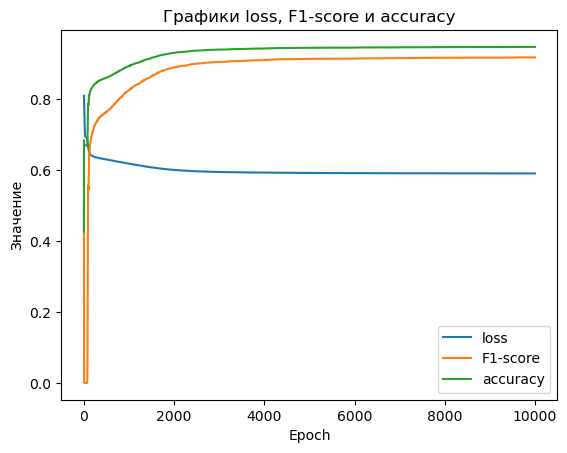

In [55]:
# построение графика loss
plt.plot(diagdf['Epoch'], diagdf['loss'], label='loss')

# построение графика F1-score
plt.plot(diagdf['Epoch'], diagdf['F1-score'], label='F1-score')

# построение графика accuracy
plt.plot(diagdf['Epoch'], diagdf['accuracy'], label='accuracy')

# добавление заголовка графика
plt.title('Графики loss, F1-score и accuracy')

# добавление подписей к осям
plt.xlabel('Epoch')
plt.ylabel('Значение')

# добавление легенды
plt.legend()

# отображение графика
plt.show()

In [56]:
pred_test=Mk1.forward(x_test.float())
pred_test_binarized = (pred_test > 0.5).float()

In [57]:
print(classification_report(y_test.to('cpu'), pred_test_binarized.to('cpu')))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      3216
         1.0       0.79      0.75      0.77      1542

    accuracy                           0.85      4758
   macro avg       0.84      0.83      0.83      4758
weighted avg       0.85      0.85      0.85      4758

